In [140]:
import numpy as np
import vtk
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph, position_color, highlight_color, component_color


%reload_ext autoreload
%autoreload 2

# Load Morse Complex

In [142]:
mc = load_complex('../data', '1')

# Construct Morse Graph

In [143]:
mg = MorseGraph.from_complex(mc)

In [144]:
simp_step = mg.simplify(min_length=15, mode='step')

simp_geo = mg.simplify(min_length=3, mode='geo_dist')

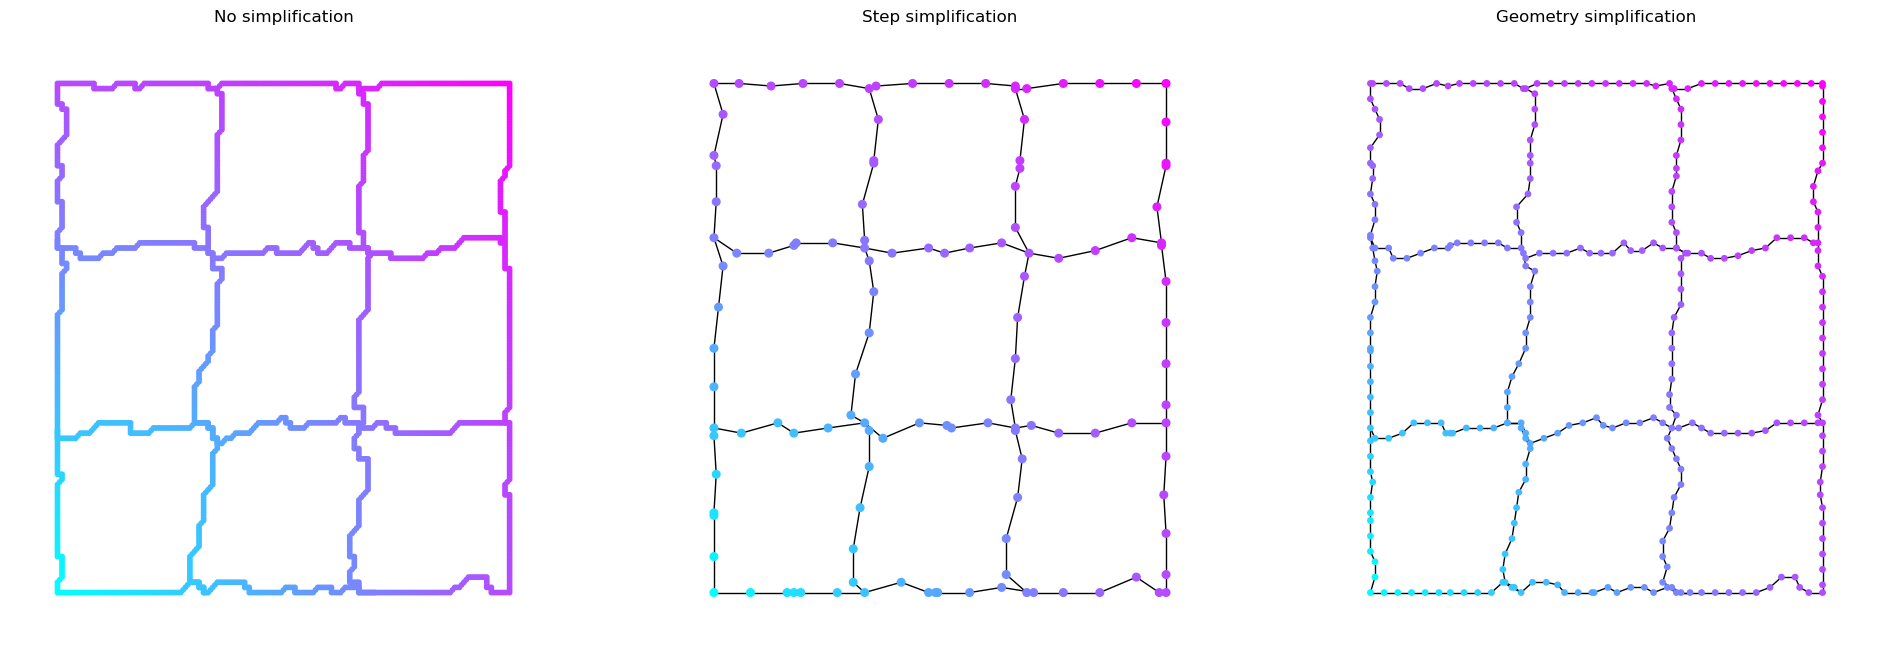

In [145]:
fig, axis = plt.subplots(1, 3, figsize=(24, 8))
cmap = 'cool'

mg.draw(ax=axis[0], cmap=cmap)
axis[0].set_title('No simplification')

simp_step.draw(ax=axis[1], node_size=30, cmap=cmap)
axis[1].set_title('Step simplification')

simp_geo.draw(ax=axis[2], node_size=15, cmap=cmap)
axis[2].set_title('Geometry simplification')

plt.show()
